In this problem, I had relied on information that I had gotten from the third question (3b) from the analytic assignment. Similar to the recommended problem approach, I had defined a function that continuously checked to see if the r component of the force had changed signs, if it had, the angle was found, otherwise using forward integration I would iterate until the signs had changed. This process was repeated for various radii and angular speeds.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def lose_contact(ang_th,R):
    #Initial theta approximately equal to (but not) 0
    th = 1e-5
    dth = ang_th
    m = 1 #Chosen arbitrarily
    
    t = 1e-4 #Timestep in s
    g = 9.81
    
    while -m*R*dth**2 + g * np.cos(th) > 0:
        
        d2th = g * np.sin(th) / R #Angular acceleration term
        th = th + dth * t + 0.5 * d2th * t**2 #Applying equation 2 (ie forward integrating the velocity term)
        dth = dth + t*d2th #Applying equation 1 (ie forward integrating the acceleration term)
    
    return th

In [3]:
#Creating different angular speeds and radii
ang_th = np.linspace(0,2.25,10)
R = [1,1.5,2]
loss_ang = []
#Applies the process for each R value
for r in R:
    angles = []
    #Finds the angle of lost contact for each condition set and puts it into a list
    for v in ang_th:
        angles.append(lose_contact(v,r))
    loss_ang.append(angles)

In [4]:
#Lists made to organize the plots
labels = ["R = 1m","R = 1.5m","R = 2m"]
colours = ["b.","g.","r."]

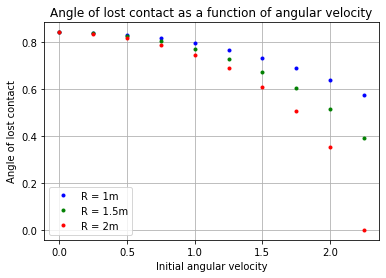

In [5]:
#Plotting for each R list created
for i in range(len(R)):
    plt.plot(ang_th, loss_ang[i],colours[i], label = labels[i])
    plt.xlabel("Initial angular velocity")
    plt.ylabel("Angle of lost contact")
    plt.title("Angle of lost contact as a function of angular velocity")
    plt.legend()
    plt.grid()

From observing the plots above for varying R values. It is shown that as R gets larger, the angle of contact with the hemisphere will be closer to the starting point of theta = 0. This is especially prevelant for cases in which the angular speed is greater in magnitude.